# Topics (related to the midterm project):

## 1. Regular Expression (regex, or sometimes RE)
## 2. return vs. yield
## 3. random.sample, numpy.random, and histogram plots 

## Regular expression


### "The limits of my language mean the limits of my world."  

### \- Ludwig Wittgenstein


Resources:

* *Effective Computation in Physics * Chapter 8

* https://docs.python.org/3/library/re.html

In [1]:
#---------> new import
import re

### re.match(pattern, string, flags=0)


### pattern:	This is the regular expression to be matched.

### string:	This is the string, which would be searched to match the pattern at the beginning of string.

### flags:	You can specify different flags, e.g., to do case insensitive search, use flags = re.I (for all flags:

https://docs.python.org/3/howto/regex.html)


### The match() function returns a match object on success, and

        None 
        
### on failure.  

### Use group(num) or group() method of match object to access matched expression.


### *Note: match() checks for a match only at the beginning of the string*

In [8]:
'''
A match!
'''
# m = re.match("20", '2001')
m = re.match("20+", '2001')

print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 3), match='200'>
200


In [9]:
'''
Difference between the qualifier * and +
'''
print('First with * (0 or more repetitions)')
m = re.match("20*", '2')
print(m)
print(m.group())

print()
print('Now with + (1 or more repetitions)')
m = re.match("20+", '2')
print(m)
print(m.group())



First with * (0 or more repetitions)
<_sre.SRE_Match object; span=(0, 1), match='2'>
2

Now with + (1 or more repetitions)
None


AttributeError: 'NoneType' object has no attribute 'group'

In [4]:
'''
A match!
Using . -- because the year, month, date maybe separated by
- or . or ,
'''
m = re.match("20[01][0-9].[0-9][0-9].[0-9][0-9]", '2005-12-16')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 10), match='2005-12-16'>
2005-12-16


In [10]:
'''
A match!

Note that 

a) "[0-9][0-9]" at the end is NOT doing anything.
b) there doesn't seem to be anything to catch the '(day)' at the end 
-- but it didn't matter.

.* will match as many characters as possible.  That there are unused expressions
in the search string (namely, "[0-9][0-9]") -- that's OK! 

'''
reg_exp1 = "20[01][0-9].*[0-9][0-9].*[0-9][0-9]"
m = re.match(reg_exp1, '2015(year) 12(month) 16(day)')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 23), match='2015(year) 12(month) 16'>
2015(year) 12(month) 16


In [11]:
'''
To verify: after removing "[0-9][0-9]" in the search string, 
we still get a match!
'''
reg_exp2 = "20[01][0-9].*[0-9][0-9].*"
m = re.match(reg_exp2, '2015(year) 12(month) 16(day)')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 28), match='2015(year) 12(month) 16(day)'>
2015(year) 12(month) 16(day)


In [12]:
'''
.* is stopped by a newline character.
'''
m = re.match("20[01][0-9].*[0-9][0-9].*", '2015(year) 12(month)\n 16(day)')
print(m)
print(m.group())


<_sre.SRE_Match object; span=(0, 20), match='2015(year) 12(month)'>
2015(year) 12(month)


In [14]:
'''
.* is also stopped by an exact match
'''
m = re.match("20[01][0-9].*[0-9][0-9].*16", '2015(year) 12(month) 16(day)')
print(m)
print(m.group())


<_sre.SRE_Match object; span=(0, 23), match='2015(year) 12(month) 16'>
2015(year) 12(month) 16


In [15]:
# A match!  [0-9] --> \d
m = re.match("20[01]\d.*[0-9][0-9].*", '2015(year) 12(month) 16(day)')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 28), match='2015(year) 12(month) 16(day)'>
2015(year) 12(month) 16(day)


In [16]:
# match or not?  '2015-12-16' --> '2015a12b16'
import re
m = re.match("20[01][0-9].*[0-9][ 0-9].*", '2015a12b16')
if m:
    print(m.group())

2015a12b16


In [17]:
# match or not?  second '.*' --> [^a-z]
import re
m = re.match("20[01][0-9].*[0-9][0-9][^a-z][0-9][0-9]", '2015a12b16')

# but this would match
#m = re.match("20[01][0-9].*[0-9][0-9][^a-z][0-9][0-9]", '2015a12-16')

if m:
    print(m.group())
else:
    print('no match')

no match


In [18]:
# match or not?  [^a-z] --> [^a]
m = re.match("20[01][ 0-9].*[0-9][0-9][^a][0-9][0-9]", '2015a12b16')
if m:
    print(m.group())
else:
    print('no match')

2015a12b16


In [19]:
'''The question of how far .* extends to'''
import re
m = re.match("20[01][0-9].*[0-9][0-9]", '2019adlkfj are1216')
if m:
    print(m.group())
else:
    print('no match')

2019adlkfj are1216


In [ ]:
# match or not? and why?
m = re.match(" 20[01][0-9].*[0-9][0-9].*", '2015a12&16')
if m:
    print(m.group())
else:
    print('no match')

In [ ]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very\
interesting will happen on 2018-12-16.  You just wait and see.')
if m:
    print(m.group())
else:
    print('no match')

In [ ]:
# match or not?  Note: here .* is stopped by the exact match of "20"
import re
m = re.match(".*20[01][0-9].*[0-9][0-9].*", 'Something very intereting \
will happen on 2018-12-16.  You just wait and see.')
if m:
    print(m.group())
else:
    print('no match')

In [ ]:
# A silly example: Match or not?
import re
m = re.match(".*20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very interesting \
will happen on 2018.12.16.  You just wait and see.')
if m:
    print(m.group())
else:
    print('no match')

## re.search()

### If you want to locate a match anywhere in string, use search()

In [20]:
m = re.search("20[02][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very \
interesting will happen on 2020-12-16.  You just wait and see.')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(42, 52), match='2020-12-16'>
2020-12-16


In [21]:
'''
the .group() method, and note: the second occurrence was ignored.
The ()'s in the pattern delineate the groups.
'''
m = re.search("(20[02][0-9])-([0-9][0-9])-([0-9][0-9])", \
              'Something very interesting will happen on 2020-12-16. \
              You just wait and see, only after 2020-12-16.')

# all groups
print(m.group())
print(m.group(0))
print(m.group(0) == m.group())

# individual groups
print('year:', m.group(1))
print('month:', m.group(2))
print('date:', m.group(3))

2020-12-16
2020-12-16
True
year: 2020
month: 12
date: 16


## re.findall()

### To find all occurrences, use findall() -- returns the results as a list

In [22]:
m = re.findall("20[02][0-9]-[0-9][0-9]-[0-9][0-9]",\
               'Something very interesting will happen on 2020-12-16.\
               You just wait and see, only after 2020-12-16.')
print(m, type(m))

['2020-12-16', '2020-12-16'] <class 'list'>


In [23]:
'''
if you want groups for each occurence, 
the groups will show up in a tuple
'''
m = re.findall("(20[02][0-9])-([0-9][0-9])-([0-9][0-9])",\
               'Something very intereting will happen on 2020-12-16.\
               You just wait and see, only after 2020-12-16.')
print(m, type(m))
print(m[0][1])

[('2020', '12', '16'), ('2020', '12', '16')] <class 'list'>
12


## Breakout Problem:

### The following text is copied from wikipedia,

### "The current men's world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009,"

### By using re.match(), extract the world record time.  You cannot use any actual words in your pattern, e.g. "seconds" would not be allowed.

### To escape the 
        . 

### use 

        \.


In [50]:
line = "The current men's world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009,"
matchObj = re.match('.* (\d*\.\d*).*', line)
if matchObj:
    print("Shortest human time for 100 meters:", matchObj.group(1))
else:
    print('no match')

Shortest human time for 100 meters: 9.58


## return vs. yield

In [54]:
'''
A peculiar thing about enumerate(): you can't use len() with enumerate()!

Compare list and enumerate below
'''
from collections import Iterable

# list
y = range(10)
print(len(y))
print(isinstance(y, Iterable))
print('y[3]', y[3])


# enuermate
z = enumerate(range(10))
print(isinstance(z, Iterable))
#print(len(z))                     # will get error.
print(next(z))
# print(z.next())
print(z.next())
# print(z.next())
# #print('z[3]', z[3])                      # will also get error.

10
True
y[3] 3
True
(0, 0)


AttributeError: 'enumerate' object has no attribute 'next'

## eunmerate() *is* an iterable; but not all iterables have a length!

In [56]:
# return:
def create_integers(N):
    lst=[]
    for i in range(N):
        lst.append(i)
    return lst
newints = create_integers(6)    
print(newints) 


[0, 1, 2, 3, 4, 5]


In [57]:
print(type(create_integers), type(newints))


<class 'function'> <class 'list'>


In [4]:
# yield:
from pdb import set_trace
def generate_integers(N):
    for i in range(N):
        # note: yield inside the for loop!
        # and NOT at the end of the function!
        yield i
        #set_trace()
        print('The {:d}th time generate_integers() is called'.format(i+1))

N = 10        
gen = generate_integers(N)
print(type(generate_integers), type(gen))


<class 'function'> <class 'generator'>


In [5]:
# It shows you that the next generate_integers() is called, 
# python starts from the statement immediately below the yield statement.
next(gen)

0

In [60]:
# Note: it started from 1 (and not 0)!
for i in range(6):
    intg = next(gen)
    print(intg)

The 1th time generate_integers() is called
1
The 2th time generate_integers() is called
2
The 3th time generate_integers() is called
3
The 4th time generate_integers() is called
4
The 5th time generate_integers() is called
5
The 6th time generate_integers() is called
6


In [6]:
'''
You will get error if the previous cell has been run.
a generator cannot be easily reset
'''
for i in range(6):
    print(next(gen))

The 1th time generate_integers() is called
1
The 2th time generate_integers() is called
2
The 3th time generate_integers() is called
3
The 4th time generate_integers() is called
4
The 5th time generate_integers() is called
5
The 6th time generate_integers() is called
6


## Breakout Problem: Write a function that generates all Fibonacci numbers less than 300 by using yield.  

Definition: 

$F_n = F_{n-1} + F_{n-2}$; 

$F_0 = 0$ and $F_1 = 1$.  

_Hint_: Once you have calculated $F_3$, you have no need for $F_0$ and $F_1$; once you know $F_4$, you have no need for $F_3$ and $F_2$; and so forth.

So for every new round, you only need to keep the previous two numbers.

Computing by hand:

$F_0 = 0$
            
$F_1 = 1$

$F_2 = 1$

$F_3 = 2$

...


In [41]:
def fib():
    a = 0
    b = 1
    while True:
        yield a
        old_a = a
        a = b
        b = b + old_a
#         a,b = b,a+b
        
fibo_ind = 0
for fibo in fib():
    fibo_ind += 1
    if fibo > 300:
        break
    else:
        print(fibo)

0
1
1
2
3
5
8
13
21
34
55
89
144
233


In [ ]:
'''
since fib() yields the next value
you can treat it like an iterable.
'''
fibo_ind = 0
for fibo in fib():
    #print 'ind = ', ind
    fibo_ind += 1
    if fibo > 300:
        break
    else:
        print(fibo)
        
# Let's work out the flow of the code.
# This is an elegant, memory efficient way of generating Fibonacci numbers 
# (note: at any time only the latest two Fibonacci numbers take up memory, 
# as is necessary for the calculation of the next Fib number.   
# All previous Fib numbers are "forgotten"!)
# This is very different from the "list" way of doing things, 
# where every element takes up memory.


## The random module

- random.shuffle()
- random.random()
- random.sample()

from http://docs.python.org/2/library/random.html:

In [ ]:
import random
lst = ['a', 'b', 'c', 'd', 'x', 'y', 'z']
random.shuffle(lst)   # this shuffles the list in place.  
print(lst)   # you can run this as many times as you want.

In [ ]:
'''
to generate one random number between 0 and 1 from a uniform distribution
'''
import random
random.random()

## random.sample(population, k)

Return a k length list of unique elements chosen from the population sequence. 

Returns a new list containing elements from the population while leaving the original population unchanged. 


In [2]:
# Example of random.sample:
from random import sample
print(sample(range(10000000), 10))


[1757455, 728029, 2597772, 988483, 2989755, 4740728, 6863502, 8480601, 1353395, 9249758]


In [3]:
### Another example: 
from string import ascii_lowercase
print(type(ascii_lowercase), len(ascii_lowercase))
# So yes, you can only import modules, functions but also strings and other objects.
# In Python: almost everything is an object (modules, functions, strings, ints, floats,
# dictionaries, lists, classes, etc.)
# and therefore, there is no fundamental difference between them in terms of how they
# are treated and used in Python.
print(ascii_lowercase)
print(sample(ascii_lowercase, 10))

<class 'str'> 26
abcdefghijklmnopqrstuvwxyz
['e', 't', 'o', 'q', 'y', 'b', 'k', 'l', 'f', 'a']


## ASCII stands for: American Standard Code for Information Interchange

## numpy.random


- numpy.random.randn()
- numpy.random.rand()

http://docs.scipy.org/doc/numpy/reference/routines.random.html

Gaussian distribution -- $\mu$ (mu) is the mean, and $\sigma$ (sigma) is the standard deviation. 

In [4]:
from numpy.random import randn
x = randn()
print(x)

-1.327680154558133


In [5]:
from numpy.random import rand
x = rand()
print(x)

0.881551151474803


In [6]:
'''
To vary the mean and the standard deviation
'''
import numpy as np
from numpy.random import randn
x = randn(10000)*2. + 3.
#print(x)
print(np.mean(x))
print(np.std(x))

3.00427492339
1.9958002268


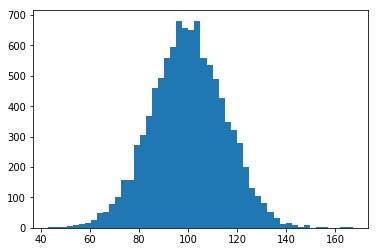

In [7]:
'''Histogram Plot'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(10000)*15 + 100
fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data

Nbins = 50
ax.hist(x, Nbins)
# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be Nbin probability
# density values (n), Nbin+1 bin edges (bins), and finally, Nbin patches.

plt.show()


n (normalized height, or probability density): [  4.24826114e-05   0.00000000e+00   1.27447834e-04   4.24826114e-05
   2.54895669e-04   8.49652228e-05   4.24826114e-04   9.34617451e-04
   9.77100063e-04   1.35944357e-03   2.03916535e-03   2.54895669e-03
   3.27116108e-03   4.46067420e-03   5.99004821e-03   8.75141795e-03
   1.23199573e-02   1.28722313e-02   1.72054576e-02   1.73329055e-02
   2.18360623e-02   2.46399146e-02   2.39177102e-02   2.71039061e-02
   2.54046016e-02   2.59568756e-02   2.50647407e-02   2.50222581e-02
   2.21759232e-02   2.02642056e-02   1.78851794e-02   1.59309793e-02
   1.30846443e-02   1.09605137e-02   8.41155706e-03   7.22204394e-03
   5.73515254e-03   4.20577853e-03   2.93130019e-03   2.08164796e-03
   1.18951312e-03   1.01958267e-03   8.92134840e-04   2.54895669e-04
   1.27447834e-04   1.27447834e-04   4.24826114e-05   8.49652228e-05
   4.24826114e-05   1.69930446e-04] 50
bins (locations of bin edges): [  41.15597585   43.50988011   45.86378437   48.2176886

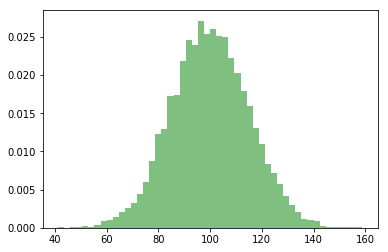

In [8]:
'''
Histogram Plot

Now, let's make it a little better

'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(10000)*15 + 100
fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data

Nbins = 50
# normed=1: the total area adds up to 1; # alpha: level of tranparency.
n, bins, patches = ax.hist(x, Nbins, normed=1, facecolor='g', alpha=.5)
print('n (normalized height, or probability density):', n, len(n))
print('bins (locations of bin edges):', bins, len(bins))

# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be Nbin probability
# density values (n), Nbin+1 bin edges (bins), and finally, Nbin patches.

plt.show()


## Breakout Exercise:

## Give the above plot:

- ### A title: Histogram of IQ: mu=100, sigma=15
- ### Appropriate labels for the x and y axes 
- ### Appropriate and aesthetically pleasing x and y limits.

## End of wk 5-1